# Density plots: Transience v. Novelty and Resonance v. Novelty

## Preliminaries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as pyp
import matplotlib as mpl

In [3]:
%matplotlib inline

In [4]:
# matplotlib globals
mpl.rcParams['axes.labelsize'] = 10
mpl.rcParams['axes.titlesize'] = 11
mpl.rcParams['xtick.labelsize'] = 9
mpl.rcParams['ytick.labelsize'] = 9
mpl.rcParams['xtick.direction'] = 'in'
mpl.rcParams['ytick.direction'] = 'in'
mpl.rcParams['lines.linewidth'] = 2
mpl.rcParams['legend.fontsize'] = 'small'
mpl.rcParams['font.family'] = 'serif'

In [5]:
centininch = 2.54
inchincent = .3937

def centtoinch(cents):
    return .3937*cents

def inchtocent(inches):
    return 2.54*inches

## Data

In [20]:
# Load in novelty, transience, resonance

example_NTR_path = '/Users/h2jw/Documents/GitHub/NLP-FOMC/novelty_transience_resonance/all data/100 topics/novel_trans_reson_w7.txt'

NTR_df = pd.read_table(example_NTR_path, sep=' ',
                       header=None, names=['Novelty', 'Transience', 'Resonance'])

## Density plots

In [18]:
def plot_quants_2Dhist(quants, NTR_df, ax, xbins, ybins, make_cbar=True,
                       cbar_axis=False, cbar_orientation='vertical', colorvmax=None):

    q0 = NTR_df[quants[0]]
    q1 = NTR_df[quants[1]]
    
    q0bins = xbins
    q1bins = ybins
    
    #df[['col1', 'col2', 'col4']].to_numpy()
    H, xedges, yedges = np.histogram2d(q0.to_numpy(),
                                       q1.to_numpy(),
                                       bins=[q0bins, q1bins])

    # H needs to be rotated and flipped
    H = np.rot90(H)
    H = np.flipud(H)

    # Mask zeros
    Hmasked = np.ma.masked_where(H==0,H) # Mask pixels with a value
    
    # Plot 2D histogram using pcolor
    if colorvmax:
        usemax = colorvmax
    else:
        usemax = H.max()
    pcolm = ax.pcolormesh(xedges,yedges,Hmasked, norm=mpl.colors.LogNorm(vmin=1, vmax=usemax))
    
    if make_cbar:
        if cbar_axis:
            cbar = fig.colorbar(pcolm, cax=cbar_axis, orientation=cbar_orientation)  
        else:
            cbar = fig.colorbar(pcolm, ax=ax, orientation=cbar_orientation)
        cbar.ax.set_ylabel('counts')
    
    ax.set_xlabel(quants[0])
    ax.set_ylabel(quants[1])
    
    if make_cbar:
        return H, cbar
    else:
        return H

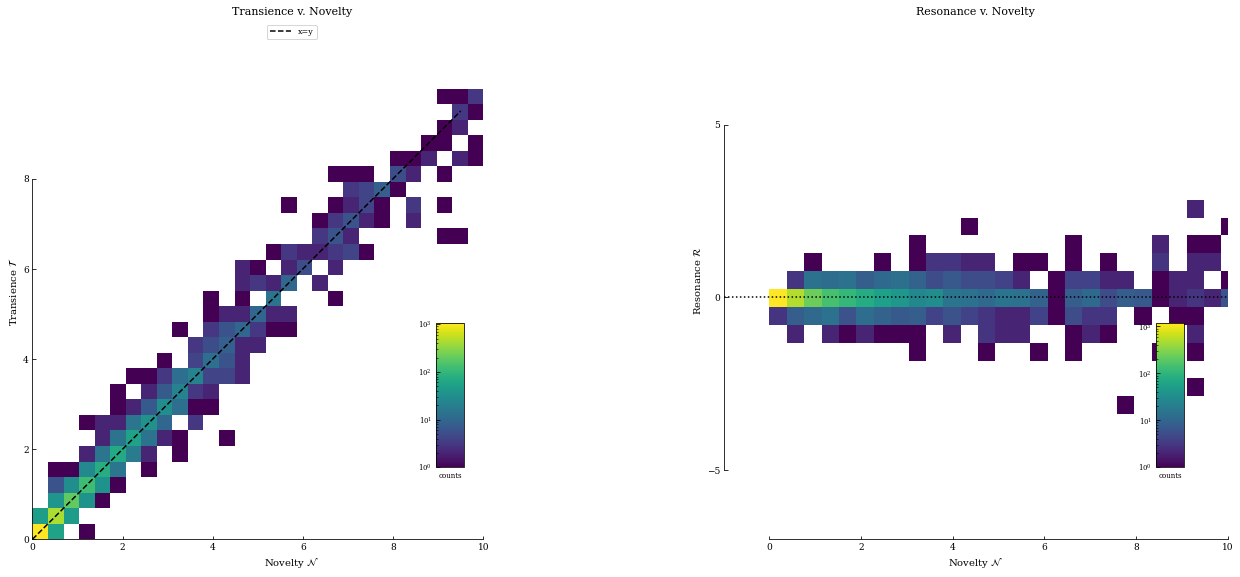

In [21]:
# Plot densities:
#
# 1) transience v. novelty,
# 2) resonance v. novelty

figsize = (20,10)

fig = pyp.figure(figsize=figsize)

# Uncomment to see figure extent.
#ax = fig.add_axes([0., 0., 1., 1.])

## Plot Transience v. Novelty

ax = fig.add_axes([0.1, 0.19, 0.4, 0.72])

cbaxes = fig.add_axes([0.4, 0.29, 0.02, 0.2])

quants = ['Novelty', 'Transience']

xbins = np.linspace(0, 10, 30)
ybins = np.linspace(0, 10, 30)

H, cbar = plot_quants_2Dhist(quants, NTR_df, ax, xbins, ybins,
                             make_cbar=True, cbar_axis=cbaxes, cbar_orientation='vertical')
cbar.ax.set_ylabel('')
cbar.ax.set_xlabel('counts', fontsize=7)
cbar.ax.xaxis.set_label_position('bottom')
cbar.ax.yaxis.set_ticks_position('left')
cbar.ax.tick_params(labelsize=7)

### Identity (x=y) line
ax.plot([0, 9.5], [0, 9.5], 'k--', linewidth=1.5)

ax.legend([mpl.lines.Line2D([0], [0], color='k', linewidth=1.5, linestyle='--')],
          ['x=y'],
          loc='upper center', fontsize=8, ncol=2, handlelength=2.7)

ax.set_ylabel('Transience $\mathcal{T}$         ')
ax.set_xlabel('Novelty $\mathcal{N}$')

ax.set_title('Transience v. Novelty')

ax.set_aspect('equal')

### Hide the right and top spines.
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
### Show ticks only on the left and bottom spines.
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')

# Limit spine range
ax.spines['left'].set_bounds( 0, 8)
ax.set_yticks([0, 2, 4, 6, 8])
ax.spines['bottom'].set_bounds( 0, 10)
ax.set_xticks([0, 2, 4, 6, 8, 10])

ax.set_ylim(0, 11.5)
ax.set_xlim(0, 11.5)


## Plot Reson v. Novelty

ax = fig.add_axes([0.6, 0.19, 0.35, 0.72])

cbaxes = fig.add_axes([0.9, 0.29, 0.02, 0.2])

quants = ['Novelty', 'Resonance']

xbins = np.linspace(0, 11, 30)
ybins = np.linspace(-7, 8, 30)

H, cbar = plot_quants_2Dhist(quants, NTR_df, ax, xbins, ybins,
                             make_cbar=True, cbar_axis=cbaxes, cbar_orientation='vertical')
cbar.ax.set_ylabel('')
cbar.ax.set_xlabel('counts', fontsize=7)
cbar.ax.xaxis.set_label_position('bottom')
cbar.ax.yaxis.set_ticks_position('left')
cbar.ax.tick_params(labelsize=7)

ax.axhline(color='k', linewidth=1.5, linestyle=':')

ax.set_xlim(-1, 10)
ax.set_ylim(-7, 8)

### Hide the right and top spines.
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
### Show ticks only on the left and bottom spines.
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')

### Limit spine range
ax.spines['left'].set_bounds( -5, 5)
ax.set_yticks([-5, 0, 5])
ax.spines['bottom'].set_bounds( 0, 10)
ax.set_xticks([ 0, 2, 4, 6, 8, 10])

ax.set_ylabel('Resonance $\mathcal{R}}$')
ax.set_xlabel('Novelty $\mathcal{N}$')

_ = ax.set_title('Resonance v. Novelty')